# Chapter 4 파이토치 기본

## 4.1 텐서

4.1.1 여러 가지 텐서
- 파이토치의 기본 단위. GPU 연산을 가능하게 하며 Numpy의 배열과 유사

In [ ]:
import torch
import numpy as np

x = torch.empty(5,4) # 빈 텐서 생성
print(x)

tensor([[4.7429e+30, 2.0539e-35, 4.1589e+21, 9.9504e+21],
        [4.1589e+21, 2.8295e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 2.6375e+30, 1.1210e-43, 2.9217e-41],
        [1.6816e+20, 4.4254e+30, 1.8545e+25, 1.7539e+19],
        [1.6635e+22, 7.3680e+28, 4.4248e+30, 1.8545e+25]])


In [ ]:
torch.ones(3,3) # 3x3 일 행렬

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.zeros(2) # 2행 영 벡터

tensor([0., 0.])

In [ ]:
torch.rand(5,6) # 5x6 무작위 행렬

tensor([[0.3971, 0.2219, 0.3922, 0.7164, 0.1959, 0.8042],
        [0.9737, 0.9750, 0.2905, 0.8645, 0.6756, 0.2383],
        [0.1369, 0.8651, 0.5220, 0.0152, 0.3336, 0.7998],
        [0.4045, 0.8090, 0.9492, 0.1974, 0.8041, 0.5510],
        [0.2327, 0.1791, 0.2983, 0.5620, 0.3520, 0.1191]])

### 4.1.2 리스트, 넘파이 배열을 텐서로 만들기

In [ ]:
l = [13,4] # 리스트 생성
r = np.array([4,56,7]) # 넘파이 배열 생성
torch.tensor(l)

tensor([13,  4])

In [ ]:
torch.tensor(r)

tensor([ 4, 56,  7])

### 4.1.3 텐서의 크기, 타입, 연산

In [ ]:
# 텐서의 크기 확인

x.size()[1]

4

In [ ]:
x = torch.rand(2,2) # 2x2 랜덤 행렬
y = torch.rand(2,2)
torch.add(x,y) # x+y
y.add(x) # y에 x를 더함

tensor([[1.9438, 0.1904],
        [0.7438, 1.3290]])

### 4.1.4 텐서의 크기 변환

In [ ]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [ ]:
a = x.view(64) # 크기를 바꿔주는 view 8x8 -> 64
print(a.size())

torch.Size([64])


In [ ]:
b = x.view(-1,4,4) # -1은 원래 크기가 되게 하는 값 8x8 -> -1x4x4 즉, 4x4x4 배열
print(b.size())

torch.Size([4, 4, 4])


### 4.1.5 텐서에서 넘파이 배열로 변환

In [ ]:
x = torch.rand(8,8)
y = x.numpy()
type(y)

numpy.ndarray

### 4.1.6 단일 텐서에서 값으로 반환하기

In [ ]:
x = torch.ones(1)
print(x.item())

1.0


## 4.2 역전파

### 4.2.1 그래디언트 텐서

In [2]:
import torch
# Chain rule 연쇄 법칙
x = torch.ones(2,2,requires_grad=True) # gradient 계산
y = x+1
z = 2*y**2
r = z.mean()
print("Result:",r)

Result: tensor(8., grad_fn=<MeanBackward0>)


In [3]:
# 미분 계산
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


### 4.2.2 자동 미분 - 선형회귀식

In [3]:
import torch
from matplotlib import pyplot as plt

# 일변수 데이터 생성: (x,y) 형태로 2차원 상에 표현 가능한 데이터
# 리스트 range(5)를 이용해 텐서로 만들며, 이때 원래 크기는 1차원인 torch.Size(5)
# 행렬 계산을 위해 2차원 배열로 => unsqueeze(1)을 통해 1번째 위치의 차원을 늘려줌
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1) # 임의의 5개 생성
num_features = x.shape[1] # 변수의 개수 저장: 인스턴스 개수 5, 변수(피쳐) 개수 1인 데이터

# 선형식은 y=xw+b
# 초깃값을 무작위로 주기 위한 torch.randn과 역전파를 통한 최적값 조절을 위해 requires_grad=True
w = torch.randn(num_features,1,requires_grad=True) # 크기 1(피쳐수)x1(출력값 크기)
b = torch.randn(1,requires_grad=True) # 크기 1인 텐서

# 경사하강법
learning_rate = 1e-3 # 학습률 지정
optimizer = torch.optim.SGD([w,b], lr=learning_rate)

loss_stack = [] # 매 epoch마다 손실 함수값을 저장하기 위한 빈 리스트
for epoch in range(1001): # 학습 반복 수 1001 지정
  optimizer.zero_grad() # 최적화는 계산을 누적시키므로 누적된 값을 초기화
  y_hat = torch.matmul(x,w) + b # 회귀식 모델로 예측값 산출
  loss = torch.mean((y_hat-y)**2) # 손실 함수 계산 MSE (예측값-실제값)
  loss.backward() # 역전파의 기준을 손실 함수로 정함
  optimizer.step() # 최적화
  loss_stack.append(loss.item()) # 그래프를 그리기 위해 손실 함수값만 loss_stack에 하나씩 넣음

  if epoch % 100 == 0: # 손실 함수값 출력
    print(f'Epoch {epoch}:{loss.item()}')

# 최종 학습된 w, b로 예측값 산출 (이때, 최적화 사용하지 않으므로 requires_grad 비활성화)
with torch.no_grad():
  y_hat = torch.matmul(x,w) + b

Epoch 0:44.45760726928711
Epoch 100:3.087303876876831
Epoch 200:0.2999650537967682
Epoch 300:0.1092531681060791
Epoch 400:0.09362070262432098
Epoch 500:0.09008476138114929
Epoch 600:0.08764226734638214
Epoch 700:0.08552168309688568
Epoch 800:0.08364290744066238
Epoch 900:0.08197575807571411
Epoch 1000:0.08049626648426056


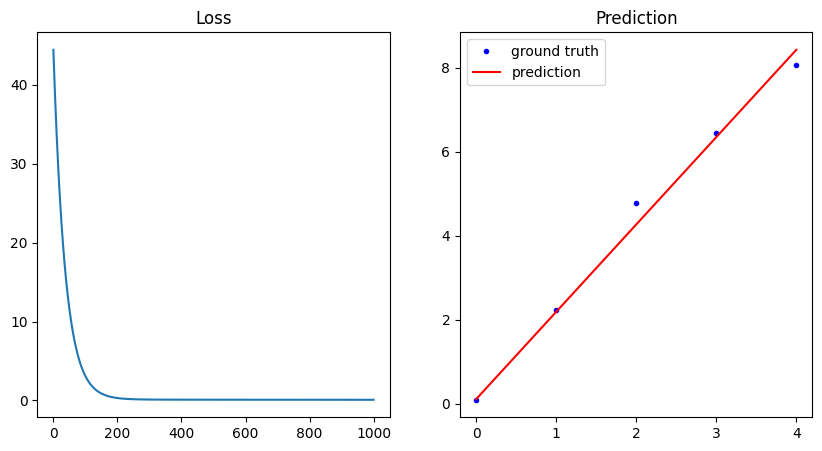

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()

## 4.3 데이터 불러오기

### 4.3.1 파이토치 제공 데이터 사용